In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('../data/bitcoin_zip/bitcoin_csv.csv')

In [4]:
data.columns

Index(['date', 'txVolume(USD)', 'adjustedTxVolume(USD)', 'txCount',
       'marketcap(USD)', 'price(USD)', 'exchangeVolume(USD)', 'generatedCoins',
       'fees', 'activeAddresses', 'averageDifficulty', 'paymentCount',
       'medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount'],
      dtype='object')

In [5]:
data.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [141]:
clean_data = data[~data[data.columns[1]].isna()]

In [142]:
[sum(clean_data[col].isna()) for col in clean_data.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [143]:
clean_data.describe()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
count,2.035000e+03,2.035000e+03,2035.000000,2.035000e+03,2035.000000,2.035000e+03,2035.000000,2035.000000,2.035000e+03,2.035000e+03,2.035000e+03,2035.000000,2035.000000,2.035000e+03,2035.000000
mean,2.735073e+09,1.139493e+09,167972.103194,3.771208e+10,2279.330865,1.434180e+09,3096.876531,83.448355,4.341214e+05,9.800067e+11,2.861523e+05,177.112048,0.000230,9.095673e+07,156.092383
std,5.160649e+09,1.970668e+09,91453.126249,5.861474e+10,3442.946652,3.035095e+09,1117.642624,134.066927,2.599539e+05,1.869241e+12,1.581062e+05,342.486667,0.000262,4.740860e+07,19.434035
min,3.287234e+07,2.053871e+07,30170.000000,7.794864e+08,68.500000,0.000000e+00,1000.000000,8.054165,4.840200e+04,8.974296e+06,4.549700e+04,0.024145,0.000009,1.416367e+07,80.000000
25%,2.523401e+08,1.027608e+08,75591.000000,4.380106e+09,320.220000,1.866320e+07,1931.249999,16.009602,1.950540e+05,2.982973e+10,1.530415e+05,51.360193,0.000100,4.315804e+07,143.000000
50%,7.898199e+08,2.824168e+08,179682.000000,8.121197e+09,596.330000,5.785860e+07,3450.000000,31.827327,4.462600e+05,1.441164e+11,3.053310e+05,76.016323,0.000100,1.001006e+08,154.000000
75%,3.428363e+09,1.557028e+09,236544.500000,4.237367e+10,2575.190000,1.180765e+09,3975.000000,73.349066,6.370415e+05,7.116972e+11,3.764885e+05,192.290392,0.000310,1.298097e+08,167.000000
max,4.835307e+10,1.624809e+10,490459.000000,3.261873e+11,19475.800000,2.384090e+10,6500.000000,1495.946477,1.283929e+06,7.454969e+12,1.883744e+06,4176.310572,0.002260,2.040237e+08,260.000000


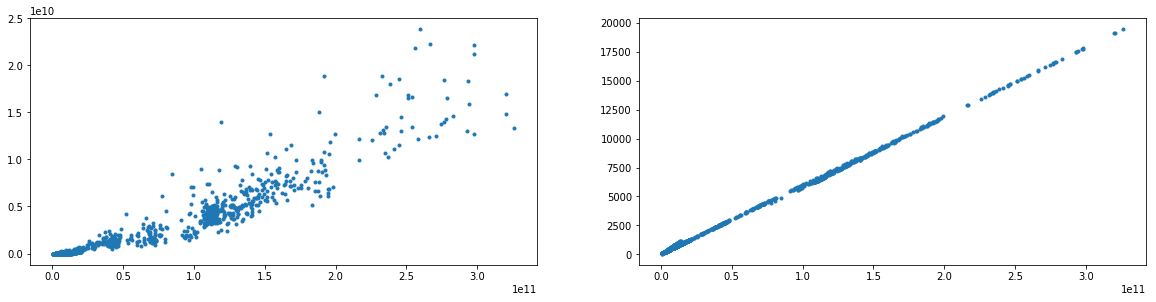

In [144]:
plt.subplot(2,2,1)
plt.scatter(clean_data['marketcap(USD)'], clean_data['exchangeVolume(USD)'], marker=".");
plt.subplot(2,2,2)
plt.scatter(clean_data['marketcap(USD)'], clean_data['price(USD)'], marker=".");

In [145]:
clean_data = clean_data.drop(columns=['date', 'marketcap(USD)'])

In [146]:
cor = np.corrcoef(np.transpose(clean_data))

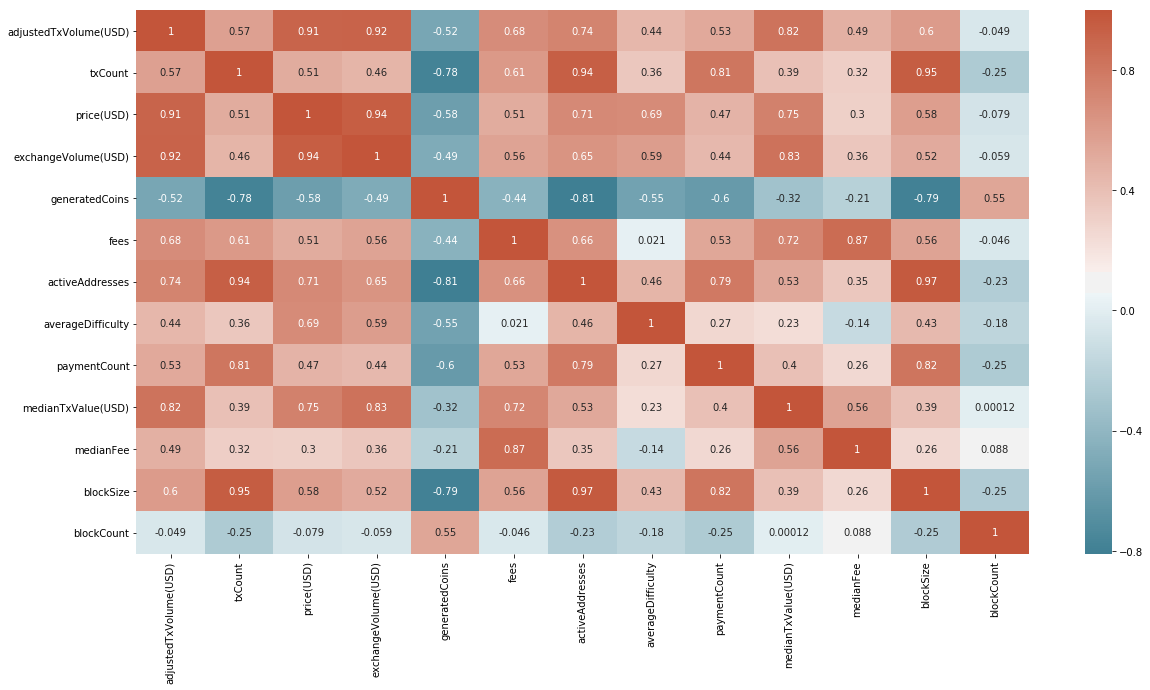

In [147]:
corr = clean_data.drop(columns=[clean_data.columns[0]]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

In [148]:
cor[0]

array([ 1.        ,  0.94003775,  0.56525384,  0.81494714,  0.80573653,
       -0.44357679,  0.68623816,  0.69636514,  0.31774175,  0.52411583,
        0.76762008,  0.50023611,  0.5625967 , -0.01326516])

In [150]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [151]:
clean_data.columns

Index(['txVolume(USD)', 'adjustedTxVolume(USD)', 'txCount', 'price(USD)',
       'exchangeVolume(USD)', 'generatedCoins', 'fees', 'activeAddresses',
       'averageDifficulty', 'paymentCount', 'medianTxValue(USD)', 'medianFee',
       'blockSize', 'blockCount'],
      dtype='object')

In [227]:
y_columns = ['medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount']
X = clean_data.drop(columns=y_columns)
y = clean_data.loc[:, [y_columns[3]]]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [229]:
X_train.shape

(1628, 10)

In [230]:
def getModel0():
    model = Sequential()
    model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [237]:
model = Sequential()
model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(100, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(500, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(100, kernel_initializer='normal'))
# model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, input_dim=10, kernel_initializer='normal'))
model.add(LeakyReLU())

model.add(Dense(1, kernel_initializer='normal'))
model.add(LeakyReLU())
# model.add(BatchNormalization())
model.compile(loss='mean_squared_error', optimizer='adam')

In [238]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1100      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1)                 0         
Total params: 1,601
Trainable params: 1,401
Non-trainable params: 200
_________________________________________________________________


In [239]:
early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, callbacks=[early_stopping_monitor]);

Train on 1302 samples, validate on 326 samples
Epoch 1/70
1302/1302 [==============================] - 1s 585us/step - loss: 24524.8422 - val_loss: 24104.9700
Epoch 2/70
1302/1302 [==============================] - 0s 107us/step - loss: 24039.0240 - val_loss: 23570.2572
Epoch 3/70
1302/1302 [==============================] - 0s 104us/step - loss: 23404.0340 - val_loss: 22851.4773
Epoch 4/70
1302/1302 [==============================] - 0s 103us/step - loss: 22541.6161 - val_loss: 21882.0000
Epoch 5/70
1302/1302 [==============================] - 0s 102us/step - loss: 21511.1727 - val_loss: 21447.9559
Epoch 6/70
1302/1302 [==============================] - 0s 106us/step - loss: 20357.9948 - val_loss: 20081.9142
Epoch 7/70
1302/1302 [==============================] - 0s 104us/step - loss: 19088.8711 - val_loss: 18794.3888
Epoch 8/70
1302/1302 [==============================] - 0s 103us/step - loss: 17746.6568 - val_loss: 17622.0839
Epoch 9/70
1302/1302 [==============================] - 0

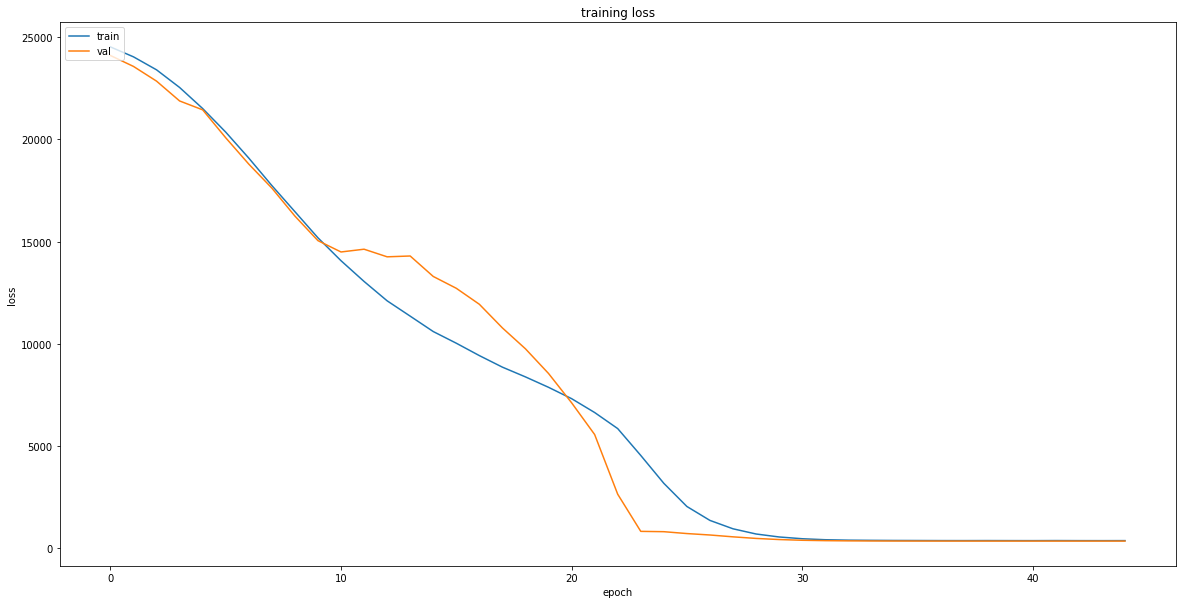

In [240]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [241]:
y_pred = model.predict(X_train)

In [242]:
np.linalg.norm(np.array(y_pred - y_train))/np.linalg.norm(np.array(y_train))

0.12350149160693774